# <b>Librerias</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# <b> Enunciado </b>

![image.png](Enunciado6.png)

# <b> Solucion </b>

## <i> Condiciones Iniciales </i>
n = 100 <br>
Intervalo = [1,2]

In [2]:
min_val = 1
max_val = 2
n = 50
h = (max_val-min_val)/(n+1)
x_vals = np.linspace(min_val,max_val,n+2)
y_1 = 2
y_2 = 8
a=-3
c=3

In [3]:
x_vals

array([1.        , 1.01960784, 1.03921569, 1.05882353, 1.07843137,
       1.09803922, 1.11764706, 1.1372549 , 1.15686275, 1.17647059,
       1.19607843, 1.21568627, 1.23529412, 1.25490196, 1.2745098 ,
       1.29411765, 1.31372549, 1.33333333, 1.35294118, 1.37254902,
       1.39215686, 1.41176471, 1.43137255, 1.45098039, 1.47058824,
       1.49019608, 1.50980392, 1.52941176, 1.54901961, 1.56862745,
       1.58823529, 1.60784314, 1.62745098, 1.64705882, 1.66666667,
       1.68627451, 1.70588235, 1.7254902 , 1.74509804, 1.76470588,
       1.78431373, 1.80392157, 1.82352941, 1.84313725, 1.8627451 ,
       1.88235294, 1.90196078, 1.92156863, 1.94117647, 1.96078431,
       1.98039216, 2.        ])

## <i>Resolucion</i>

$$
x^2_i(\frac{y_{i+1} -2y_i + y_{i-1}}{h^2}) + ax_i(\frac{y_{i+1} - y_{i-1}}{2h}) + cy_i = 0 \rightarrow \\
y_{i-1}(\frac {x^2_i}{h^2}-\frac{ax_i}{2h}) + y_{i+1}(\frac {x^2_i}{h^2}+\frac{ax_i}{2h}) + y_i(\frac {-2x^2_i}{h^2}+c) = 0 
$$

### <b><i> Construimos la Matriz </i></b>

In [4]:
M = np.identity(n)

In [5]:
for i in range(1,n+1):
    x=x_vals[i]
    if i > 1:
        M[i-1][i-2] = x**2 / h**2 - (a*x)/(2*h)
    M[i-1][i-1] = -2*x**2 / h**2 + c
    if i < n:
        M[i-1][i] = x**2 / h**2 + (a*x)/(2*h)

In [6]:
M

array([[ -5405. ,   2626. ,      0. , ...,      0. ,      0. ,      0. ],
       [  2888.5,  -5615. ,   2729.5, ...,      0. ,      0. ,      0. ],
       [     0. ,   2997. ,  -5829. , ...,      0. ,      0. ,      0. ],
       ...,
       [     0. ,      0. ,      0. , ..., -19599. ,   9652.5,      0. ],
       [     0. ,      0. ,      0. , ...,  10150. , -19997. ,   9850. ],
       [     0. ,      0. ,      0. , ...,      0. ,  10352.5, -20399. ]],
      shape=(50, 50))

### <b><i> Sacamos Vector con condiciones de frontera</i></b>

$$
y_{i-1}(\frac {x^2_i}{h^2}-\frac{ax_i}{2h}) + y_{i+1}(\frac {x^2_i}{h^2}+\frac{ax_i}{2h}) + y_i(\frac {-2x^2_i}{h^2}+c) = 0 
$$

Con i=1:
$$
y_{2}(\frac{x^2_1}{h^2} + \frac{ax_1}{2h}) + y_1(\frac{-2x^2_1}{h^2} + c) = -y_{0}(\frac{x^2_1}{h^2} - \frac{ax_1}{2h}) \\ y_0 = 2
$$

Con i=n:
$$
y_{n-1}(\frac{x^2_n}{h^2} - \frac{ax_n}{2h}) + y_n(\frac{-2x^2_n}{h^2} + c) = -y_{n+1}(\frac{x^2_n}{h^2} - \frac{ax_n}{2h}) \\ y_{n+1} = 8
$$

In [7]:
b = np.zeros(n)

In [8]:
b[0] = -y_1*((x_vals[1]**2)/(h**2)-(a*x_vals[1])/(2*h))

In [9]:
b[-1] = -y_2*((x_vals[n]**2)/(h**2)+(a*x_vals[n])/(2*h))

In [10]:
b

array([ -5564.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
       -80396.])

### <b><i> Resolvemos </i></b>

In [11]:
y = np.linalg.solve(M,b)

In [12]:
y

array([2.06612941, 2.13382691, 2.20312266, 2.27404682, 2.34662955,
       2.42090101, 2.49689137, 2.57463078, 2.6541494 , 2.7354774 ,
       2.81864493, 2.90368216, 2.99061924, 3.07948634, 3.17031361,
       3.26313122, 3.35796933, 3.45485809, 3.55382767, 3.65490822,
       3.75812991, 3.86352289, 3.97111733, 4.08094338, 4.19303121,
       4.30741097, 4.42411283, 4.54316693, 4.66460346, 4.78845255,
       4.91474438, 5.04350909, 5.17477686, 5.30857784, 5.44494219,
       5.58390006, 5.72548163, 5.86971704, 6.01663646, 6.16627005,
       6.31864796, 6.47380036, 6.6317574 , 6.79254924, 6.95620605,
       7.12275797, 7.29223518, 7.46466783, 7.64008607, 7.81852008])

In [13]:
yb = np.insert(y,0,y_1)
yb = np.insert(yb,n+1,y_2)

In [14]:
yb

array([2.        , 2.06612941, 2.13382691, 2.20312266, 2.27404682,
       2.34662955, 2.42090101, 2.49689137, 2.57463078, 2.6541494 ,
       2.7354774 , 2.81864493, 2.90368216, 2.99061924, 3.07948634,
       3.17031361, 3.26313122, 3.35796933, 3.45485809, 3.55382767,
       3.65490822, 3.75812991, 3.86352289, 3.97111733, 4.08094338,
       4.19303121, 4.30741097, 4.42411283, 4.54316693, 4.66460346,
       4.78845255, 4.91474438, 5.04350909, 5.17477686, 5.30857784,
       5.44494219, 5.58390006, 5.72548163, 5.86971704, 6.01663646,
       6.16627005, 6.31864796, 6.47380036, 6.6317574 , 6.79254924,
       6.95620605, 7.12275797, 7.29223518, 7.46466783, 7.64008607,
       7.81852008, 8.        ])

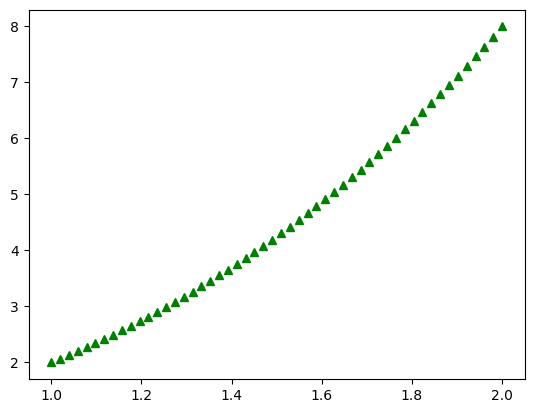

In [15]:
plt.plot(x_vals,yb,'g^')

## <i> Comparacion con Solucion Real</i>

In [16]:
y_real = (2/3)*(x_vals**3) + (4/3)*x_vals

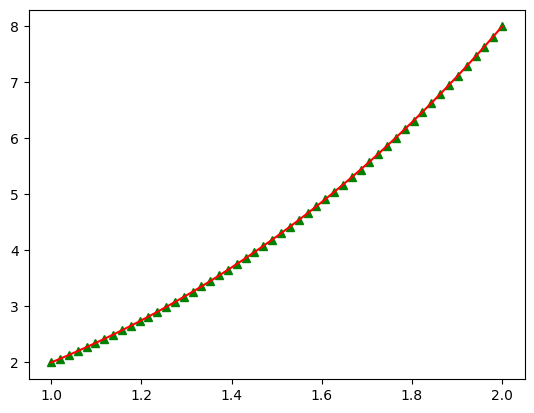

In [17]:
plt.plot(x_vals,y_real,'g^',x_vals,yb,'r-')